# Baseline Model:


## Decision Tree Classifer

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.datasets import load_iris

%matplotlib inline

In [2]:
#Load in the dataset
diabetes_df = pd.read_csv('/Users/sabrinasayed/Documents/Flatiron/Phase 3/Diabetes_Readmission_Classifier/Diabetes_Classifier_Project/Cleaned Data/cleaned_diabetes_data.csv', index_col=0)

In [3]:
diabetes_df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,Unknown,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,Otherwise
1,Caucasian,Female,[10-20),1,1,7,3,Unknown,Unknown,59,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
2,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,Unknown,11,...,No,No,No,No,No,No,No,No,Yes,Otherwise
3,Caucasian,Male,[30-40),1,1,7,2,Unknown,Unknown,44,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
4,Caucasian,Male,[40-50),1,1,7,1,Unknown,Unknown,51,...,No,Steady,No,No,No,No,No,Ch,Yes,Otherwise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,9,Unknown,Unknown,50,...,No,Steady,No,No,No,No,No,Ch,Yes,Otherwise
101755,Other,Female,[40-50),1,1,7,14,MD,Unknown,73,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise
101756,Other,Female,[60-70),1,1,7,2,MD,Unknown,46,...,No,Steady,No,No,No,No,No,No,Yes,Otherwise
101758,Caucasian,Female,[80-90),1,1,7,5,MC,Unknown,76,...,No,Up,No,No,No,No,No,Ch,Yes,Otherwise


In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69973 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      69973 non-null  object
 1   gender                    69973 non-null  object
 2   age                       69973 non-null  object
 3   admission_type_id         69973 non-null  int64 
 4   discharge_disposition_id  69973 non-null  int64 
 5   admission_source_id       69973 non-null  int64 
 6   time_in_hospital          69973 non-null  int64 
 7   payer_code                69973 non-null  object
 8   medical_specialty         69973 non-null  object
 9   num_lab_procedures        69973 non-null  int64 
 10  num_procedures            69973 non-null  int64 
 11  num_medications           69973 non-null  int64 
 12  number_outpatient         69973 non-null  int64 
 13  number_emergency          69973 non-null  int64 
 14  number_inpatient          

Fix the data types of the categorical columns

In [8]:
diabetes_df['discharge_disposition_id'] = diabetes_df['discharge_disposition_id'].astype('object')
diabetes_df['admission_source_id'] = diabetes_df['admission_source_id'].astype('object')
diabetes_df['admission_type_id'] = diabetes_df['admission_type_id'].astype('object')

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import confusion_matrix


#Feature Selection
X = diabetes_df.drop(['readmitted'], axis=1)
y= diabetes_df['readmitted']


#Label encode target variable 'y' into numerics
labenc = LabelEncoder()
y = labenc.fit_transform(y)


In [10]:
#Do the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

Separate categorical and numerical features into variables

In [11]:
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_features


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [12]:
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
numerical_features


Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

## Building the Preprocessing Pipeline:
Steps:
1. Encode the categorical features
2. Scale the numerical features
3. Create the decision tree model
4. Fit the model


I am using a Decision Tree Classifier because it is best suited for datasets with lots of categorical features and for imbalanced datasets. I will use a max_depth of 10 to prevent overfitting the data. I will also set the class weight to be balanced so that the model isn't biased towards the majority class.

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


### Encoding categorical data and scalign numerical data ###
preprocessor = ColumnTransformer(transformers=[
        ('ohe', OneHotEncoder(categories="auto", handle_unknown="ignore"), categorical_features), 
        ('ss', StandardScaler(), numerical_features)])

### Pipeline including encoding, scaling, and estimator
model_pipeline= Pipeline([('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(criterion='gini',splitter ='best',random_state=1000, max_depth = 10, class_weight= 'balanced'))])

model_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamid...
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')),
                                                 ('ss', StandardScaler(),
                                                  Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        random_state=1000))])

In [38]:
y_pred = model_pipeline.predict(X_test)

cfmat = confusion_matrix(y_test, y_pred, labels=model_pipeline.classes_)

cfmat


array([[ 915,  696],
       [6686, 9197]])

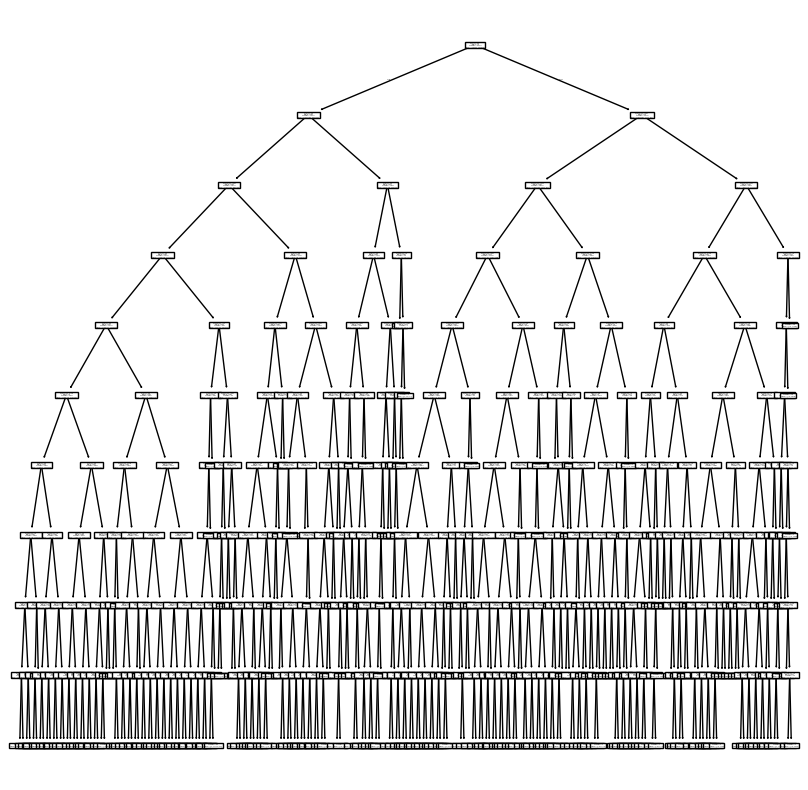

In [39]:
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(model_pipeline.named_steps['classifier'], ax=ax);

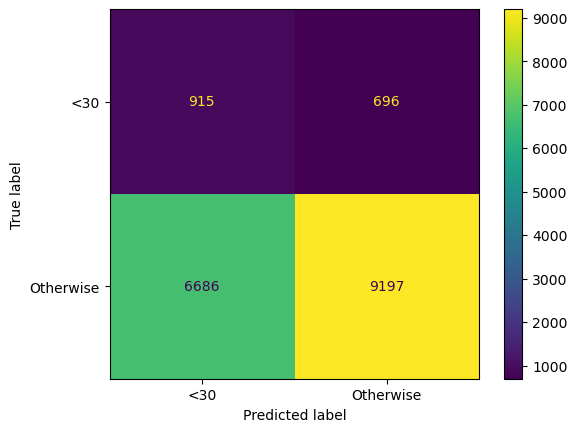

In [40]:
ConfusionMatrixDisplay.from_estimator(model_pipeline, X_test, y_test, display_labels=['<30', 'Otherwise']);

It looks like the model is performing pretty satisfactory. There are a lot of false negatives and true positives. This isn't good because we want to be good at correctly predicting when it is negative (<30)

## Evaluating the Classifier

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

The model is good at correctly identifying positive instances ('Outcome') with minimal false positives.

In [46]:
precision = precision_score(y_test, y_pred)
precision

0.9296472253108259

The model is not effective at capturing the majority of positive cases. This is measured by false negatives. It is also not good at predicting true negatives. So overall it struggles to predict the minority class.

In [47]:
recall = recall_score(y_test, y_pred)
recall

0.5790467795756469

In [48]:
f1 = f1_score(y_test, y_pred)
f1

0.7136095592799503

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.57      0.20      1611
           1       0.93      0.58      0.71     15883

    accuracy                           0.58     17494
   macro avg       0.53      0.57      0.46     17494
weighted avg       0.86      0.58      0.67     17494



In [51]:
feat_importance = model_pipeline.named_steps['classifier'].tree_.compute_feature_importances(normalize=False)
feat_importance

array([0.00016778, 0.        , 0.00056714, ..., 0.000792  , 0.00937421,
       0.00311354])

Feature: 0, Score: 0.00017
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00057
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00038
Feature: 6, Score: 0.00011
Feature: 7, Score: 0.00028
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00023
Feature: 14, Score: 0.00050
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00012
Feature: 17, Score: 0.00009
Feature: 18, Score: 0.00011
Feature: 19, Score: 0.00010
Feature: 20, Score: 0.00030
Feature: 21, Score: 0.00033
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00020
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.01303
Feature: 28, Score: 0.00054
Feature: 29, Score: 0.00080
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00076
Feature: 32, Score: 0.00049
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

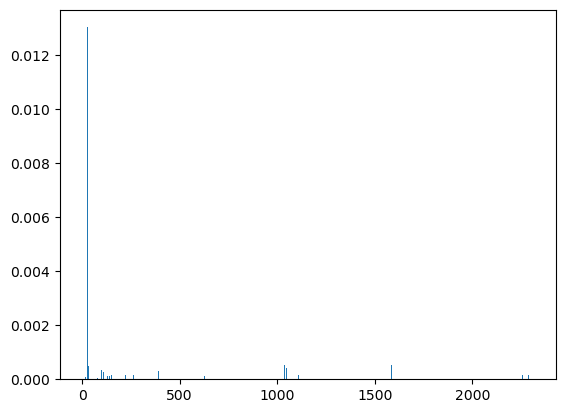

In [52]:
for i, v in enumerate(feat_importance):
    print(f'Feature: {i}, Score: {v:.5f}')
plt.bar([x for x in range(len(feat_importance))], feat_importance)
plt.show()

These features are very small, so it is difficult for us to really understand the power they have individually. It also may be misleading us to think that none of these weights have power. We would benefit from feature reduction.

In [53]:
classes = labenc.inverse_transform(y)

In [54]:
y

array([1, 1, 1, ..., 1, 1, 1])

## Hyperparameter Tuning

Using GridSearchCV to tune the max depth of the decision tree

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, 15, 20]
}

grid_search = GridSearchCV(
    model_pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

model_pipeline = grid_search.best_estimator_


Best parameters: {'classifier__max_depth': 20}
Best score: 0.7967433719412222


In [60]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamid...
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')),
                                                 ('ss', StandardScaler(),
                                                  Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                                        random_state=1000))])

In [61]:
#Initialize the decision tree
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamid...
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')),
                                                 ('ss', StandardScaler(),
                                                  Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                                        random_state=1000))])

In [63]:
#get predictions
y_pred = model_pipeline.predict(X_test)

In [64]:
cfmat = confusion_matrix(y_test,y_pred, labels=model_pipeline.classes_)
cfmat

array([[  681,   930],
       [ 4782, 11101]])

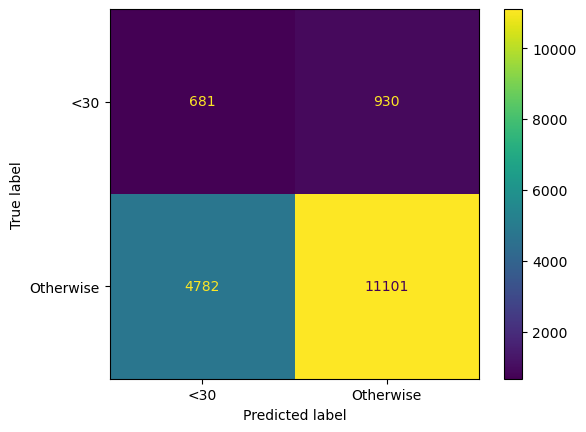

In [67]:

ConfusionMatrixDisplay.from_estimator(model_pipeline, X_test, y_test, display_labels=['<30', 'Otherwise']);

plt.savefig('Baseline_CFM.png')

In [68]:
precision = precision_score(y_test,y_pred)
precision

0.922699692461142

In [69]:
recall = recall_score(y_test, y_pred)
recall

0.6989233771957438

In [70]:
f1= f1_score(y_test,y_pred)
f1


0.7953714981729598

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.42      0.19      1611
           1       0.92      0.70      0.80     15883

    accuracy                           0.67     17494
   macro avg       0.52      0.56      0.49     17494
weighted avg       0.85      0.67      0.74     17494



Overall, after tuning, the model got better at recall of the majority class, but worse at recall of the minority class with little to no change in precision for both classes.

## Official Evaluation of Baseline Model

The baseline model is not able to identify when readmission is <30 days (class 0). Meanwhile it performs very moderately when predicting the majority class accurately. 

This shows how decision trees are not the best at handling high dimensionality and class imbalance, causing it to overfit when there's noise and complexity.

# Next Steps..

In my next model, I want use a logistic regression model.

Logistic regression will give a linear decision bounday and may handle the feature space more efficiently than a decision tree. Logistic regression will allow me to balance the class weights as well, but it might generalize better since it won't overfit as much as trees on minority samples.

Logistic regression might better capture the linear separates in the data and improve recall and precision for the minority class if combined with proper regularization and class weights.

If necessary, I can use L1 regularization to help reduce the feature space and get rid of any irrelevant features, which will be important for handling the high dimensionality. 
